# load Data set

In [17]:
! pip install ucimlrepo

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.DataFrame(X, columns=X.columns)

In [21]:
df['num'] = y.values
df['num'] = (df['num'] > 0).astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(3), int32(1), int64(10)
memory usage: 32.1 KB


In [23]:
df.to_csv('../data/heart_disease.csv', index=False)

# hundle mising values

In [24]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# data encoding

In [25]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [26]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(df[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_cols), index=df.index)
one_hot_df.head()

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Normlization

In [27]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numerical_cols)
df_scaled.head()

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.791667,0.622642,0.365297,0.282443,0.241935
2,0.791667,0.245283,0.235160,0.442748,0.419355
3,0.166667,0.339623,0.283105,0.885496,0.564516
4,0.250000,0.339623,0.178082,0.770992,0.225806


# save data to csv

In [28]:
cleaned_df = pd.concat([df_scaled, one_hot_df, df['num']], axis=1)
cleaned_df.to_csv('../data/cleaned_heart_disease.csv', index=False)

# Exploratory Data Analysis (EDA)

## Hisograms

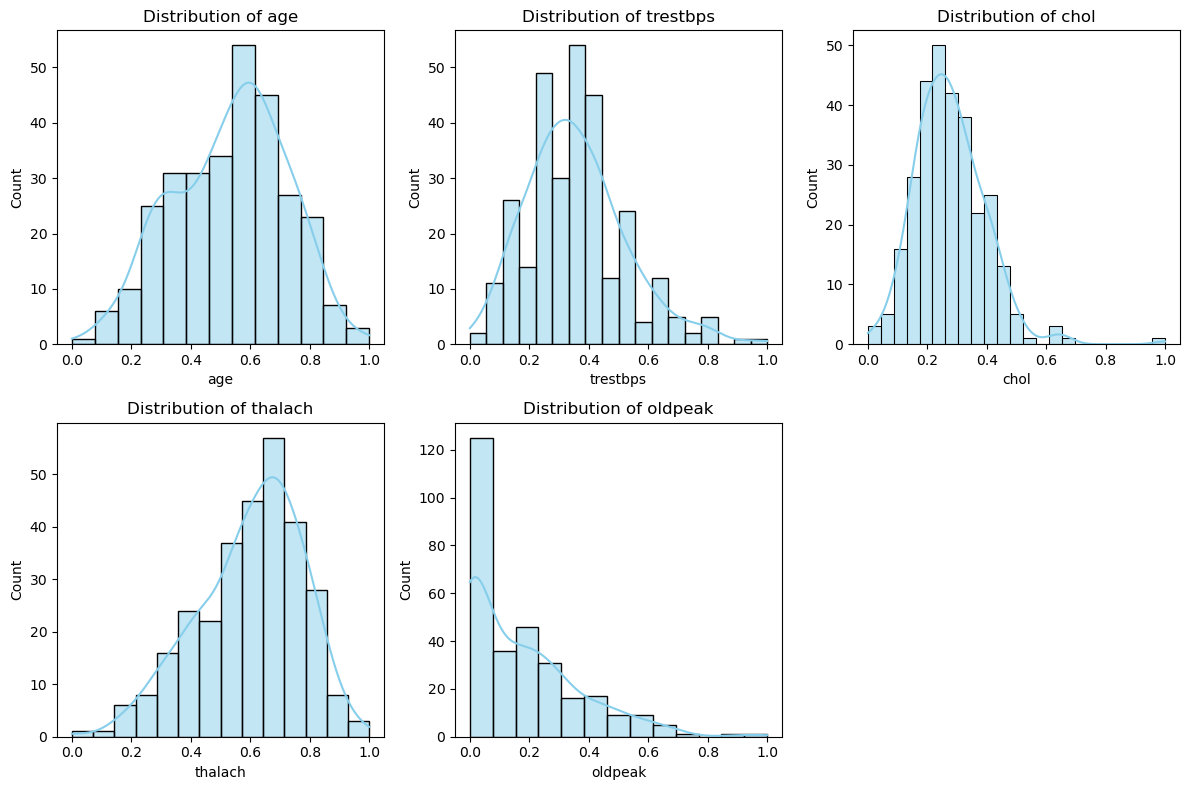

In [13]:
# Select numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_scaled[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


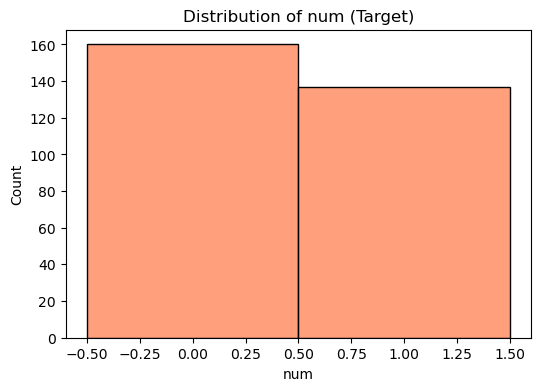

In [14]:

# Histogram for the target 'num'
plt.figure(figsize=(6, 4))
sns.histplot(df['num'], discrete=True, color='coral')
plt.title('Distribution of num (Target)')
plt.xlabel('num')
plt.ylabel('Count')
plt.show()

# correlation heatmaps

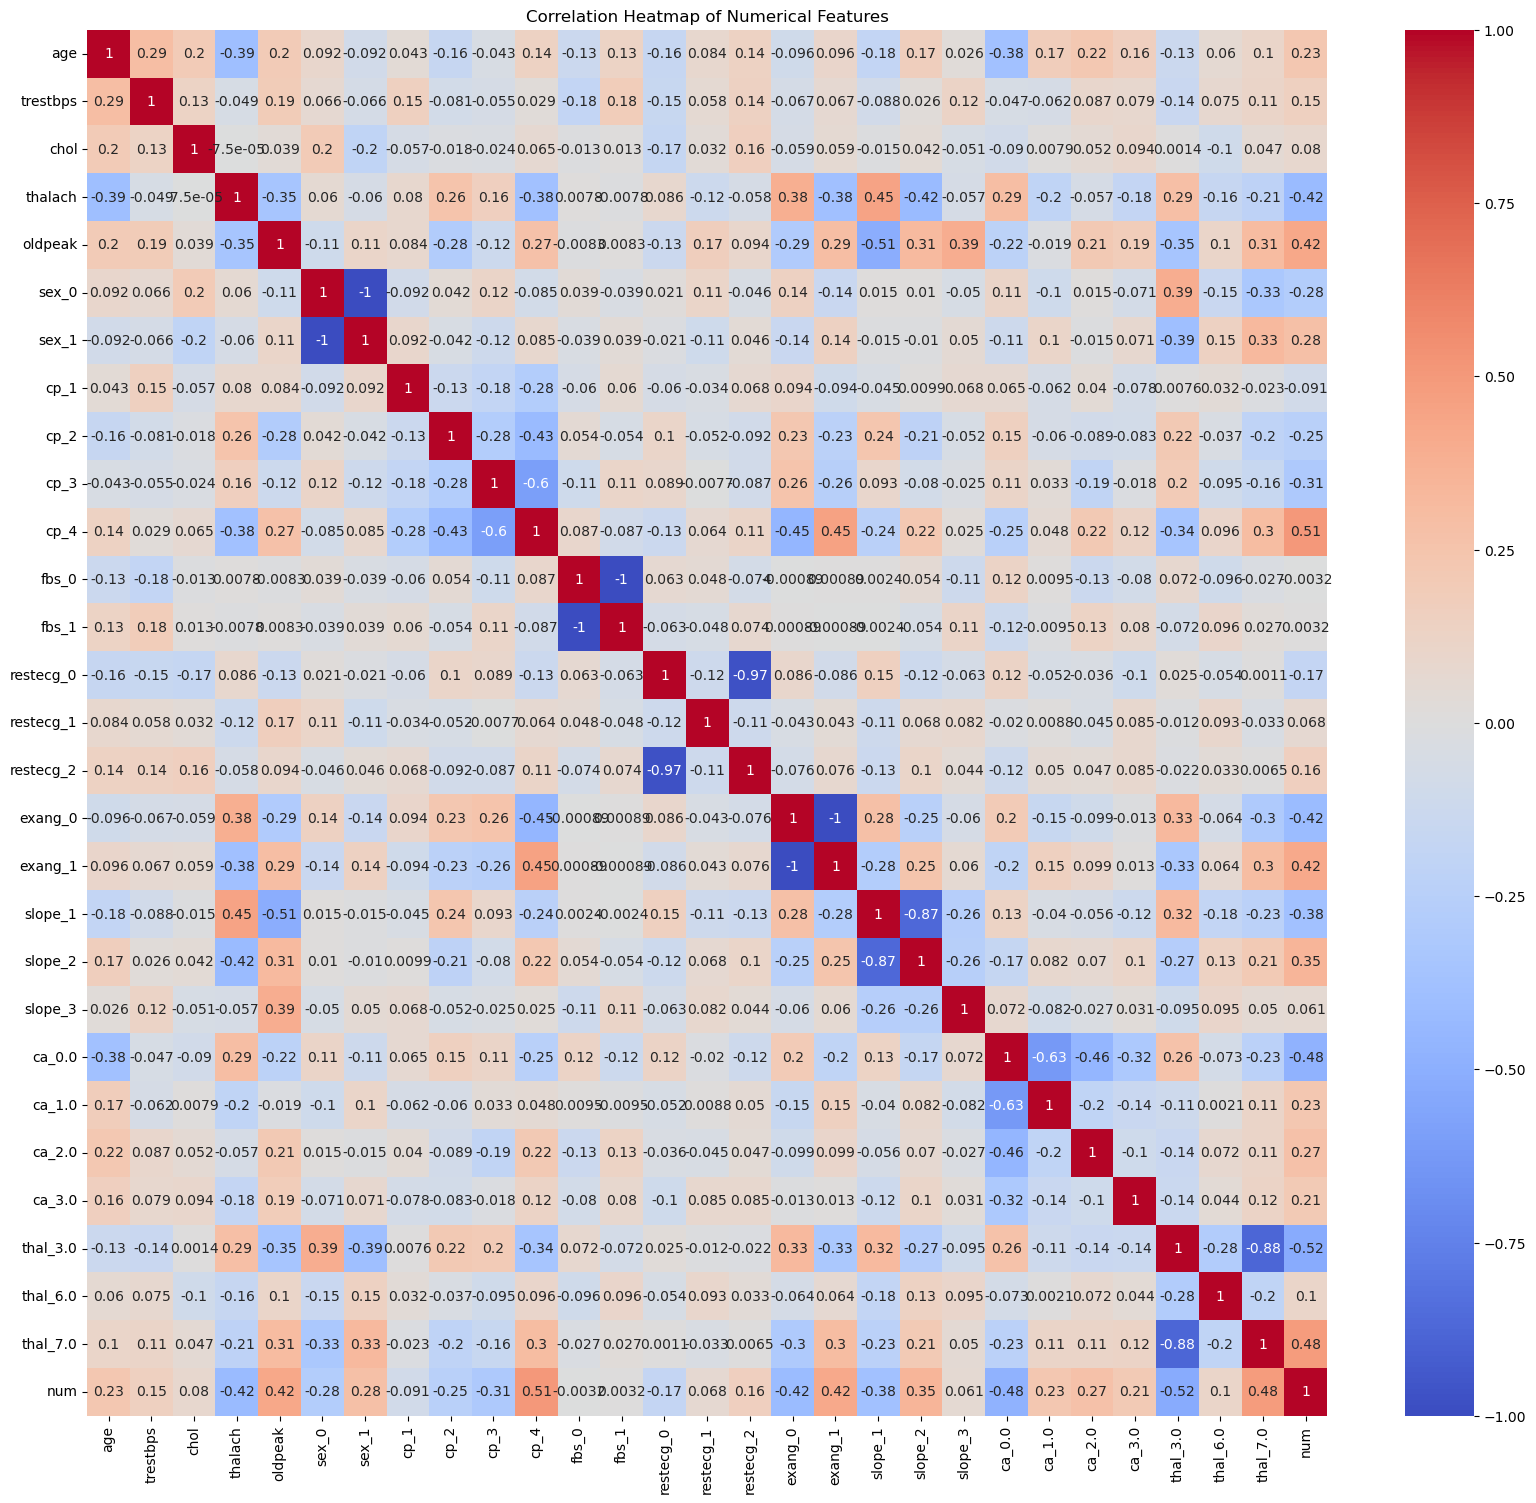

In [15]:
corr_matrix= cleaned_df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True,vmax=1,vmin=-1,center=0,cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# boxplots

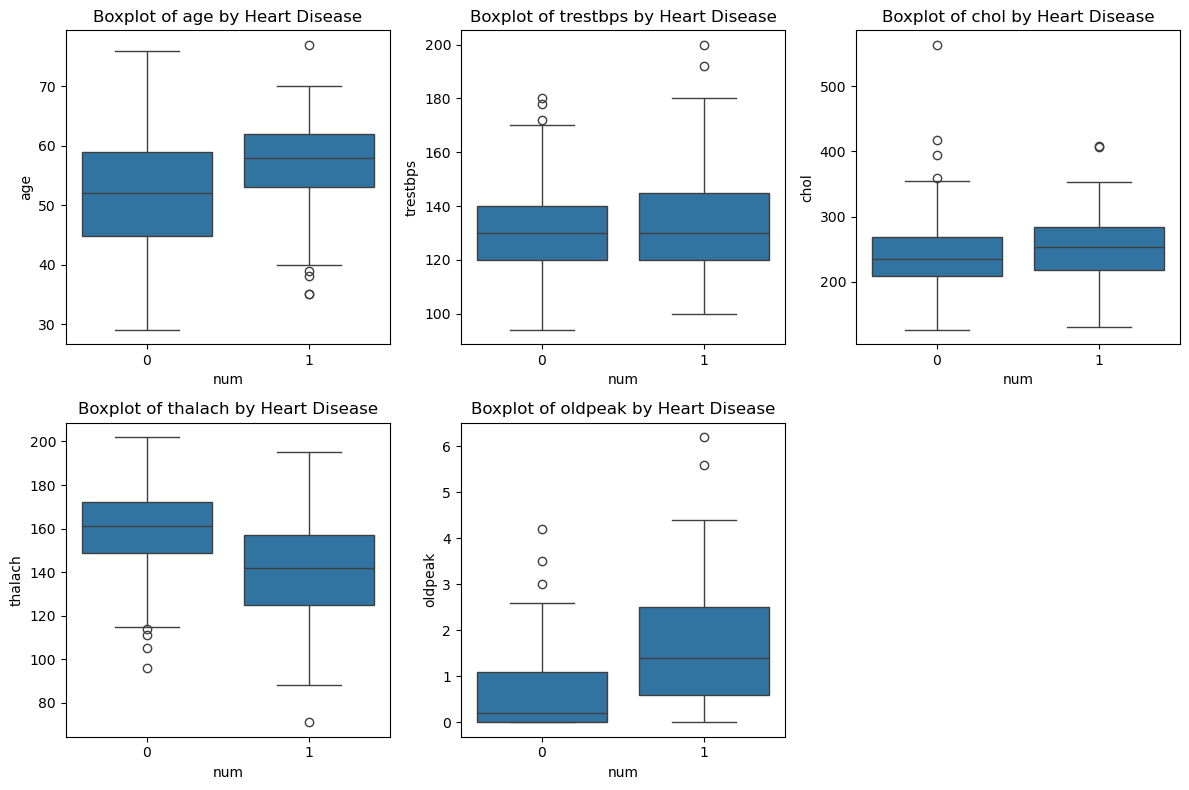

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num',y=col,data=df)
    plt.title(f'Boxplot of {col} by Heart Disease')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
